## 2D

In [1]:
import pyvista as pv
import vtk
import os
from natsort import natsorted

In [2]:
folder_path = 'exodus'

In [3]:
pvtu_files = natsorted([f for f in os.listdir(folder_path) if f.endswith(".pvtu")])[:10]
pvtu_files

['laser_000.pvtu',
 'laser_001.pvtu',
 'laser_002.pvtu',
 'laser_003.pvtu',
 'laser_004.pvtu',
 'laser_005.pvtu',
 'laser_006.pvtu',
 'laser_007.pvtu',
 'laser_008.pvtu',
 'laser_009.pvtu']

In [4]:
mesh = pv.read('exodus/laser_009.pvtu')
geometry = mesh.extract_geometry()

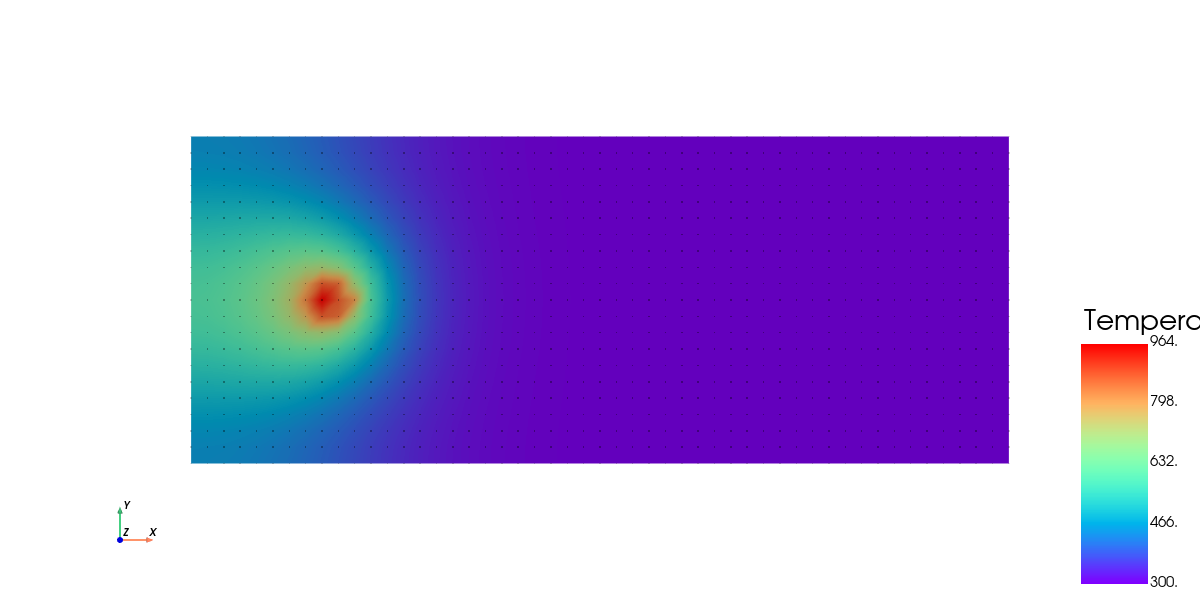

In [5]:
pv.set_jupyter_backend('static')
plotter = pv.Plotter()
scalar_bar_args = {"width": 0.15, "vertical": True, "title": "Temperature", "title_font_size": 28, "label_font_size": 15, "shadow": True, "n_labels": 5, "italic": False, "color": "k",}
plotter.add_mesh(geometry, scalars='temp', style='surface', color='k', point_size =1.5, show_vertices=False, metallic=True, cmap='rainbow', edge_color='white',  show_edges=False, scalar_bar_args=scalar_bar_args)
plotter.add_mesh(geometry, style='points', color='k', point_size =1.5, line_width=0.1, opacity=0.1,)
plotter.camera_position = 'xy'
plotter.show_axes()
plotter.camera.zoom(1.5)
plotter.show(window_size=(1200,600), jupyter_backend='static')


## 3D

In [6]:
import netCDF4 as nc
import numpy as np
import pyvista as pv

file_path = "exodus/Au-Au.e"

exo_file = nc.Dataset(file_path)
coordx = exo_file.variables['coordx'][:]
coordy = exo_file.variables['coordy'][:]
coordz = exo_file.variables['coordz'][:]
temp = exo_file.variables['vals_nod_var2'][:]  # 2 corresponds to the 3rd time step
temp = {i: temp[i, :] for i in range(temp.shape[0])}
exo_file.close()

# geometry = pv.read_exodus(file_path).extract_geometry()

points = np.column_stack((coordx, coordy, coordz))  # Combine x, y, z coordinates
mesh = pv.PolyData(points)

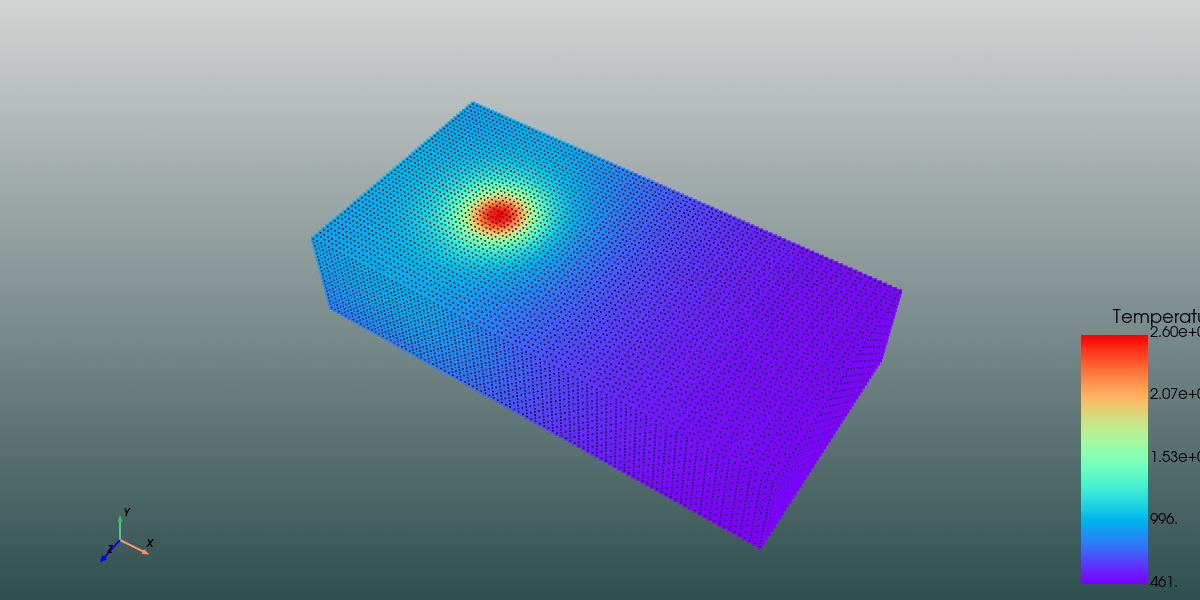

In [7]:
def temp_plot(t_step):
    plotter = pv.Plotter()
    scalar_bar_args = {"width": 0.15, "vertical": True, "title": "Temperature", "title_font_size": 18, "label_font_size": 15, "shadow": False, "n_labels": 5, "italic": False, "color": "k", }
    
    plotter.add_mesh(mesh, scalars=temp[t_step],  cmap='rainbow', scalar_bar_args=scalar_bar_args,   ) #show_vertices=False, metallic=True,edge_color='white', show_edges=True, )
    plotter.add_mesh(mesh, style='points', color='k', point_size =1.5)
    
    plotter.set_background("darkslategray", top="lightgray")
    plotter.enable_3_lights()
    plotter.show_axes()
    plotter.view_vector([1.0, 2.0, 1.5], viewup=[0,0,0]) 
    # plotter.view_vector([0.0, 1.0, 0.1], viewup=[0,0,0]) 
    plotter.show(window_size=(1200,600), jupyter_backend='static')

temp_plot(2)